In [1]:
# 每行描述一条广告素材，各字段之间由逗号分隔，顺序依次为“creativeID，adID，camgaignID，advertiserID，appID，appPlatform”。
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import pandas as pd

path = '~/codedata/tpai/pre/'
trainfile = 'train.csv'
train = pd.read_csv(path + trainfile)
ad = pd.read_csv(path + 'ad.csv')

In [2]:
train = pd.merge(train, ad, on='creativeID', how='left')
train.head()

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator,adID,camgaignID,advertiserID,appID,appPlatform
0,0,170000,NaN,3089,2798058,293,1,1,1321,83,10,434,1
1,0,170000,NaN,1259,463234,6161,1,2,1535,685,80,14,2
2,0,170000,NaN,4465,1857485,7434,4,1,147,460,3,465,1
3,0,170000,NaN,1004,2038823,977,1,1,411,564,3,465,1
4,0,170000,NaN,1887,2015141,3688,1,1,369,144,84,360,1


In [3]:
# 存在安卓、苹果、未知
var = 'appPlatform'
print train[var].value_counts()
print train.groupby(var)['label'].mean()

1    2932328
2     817200
Name: appPlatform, dtype: int64
appPlatform
1    0.024596
2    0.025866
Name: label, dtype: float64


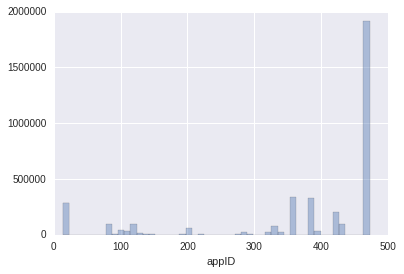

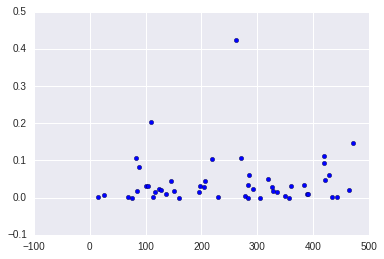

In [4]:
# 广告的appID
var = 'appID'
# print train[var].value_counts()
sns.distplot(train[var],kde=False)
fig = plt.figure()
means = train.groupby(var)['label'].mean()
# print means.head()
plt.scatter(x=means.index, y=means.values)

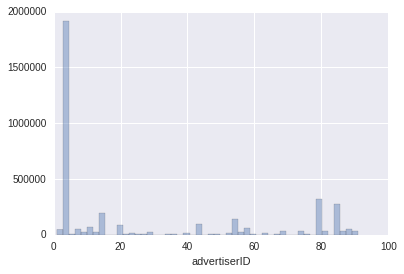

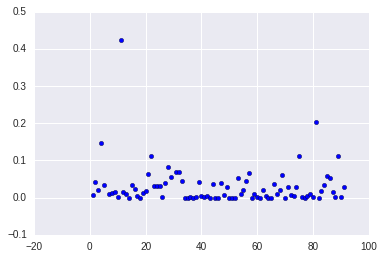

In [5]:
var = 'advertiserID'
# print train[var].value_counts()
sns.distplot(train[var],kde=False)
fig = plt.figure()
means = train.groupby(var)['label'].mean()
plt.scatter(x=means.index, y=means.values)

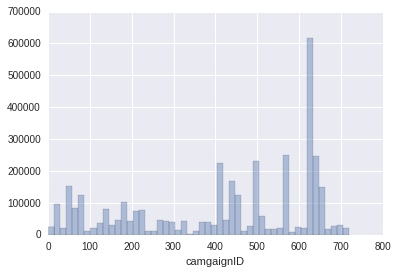

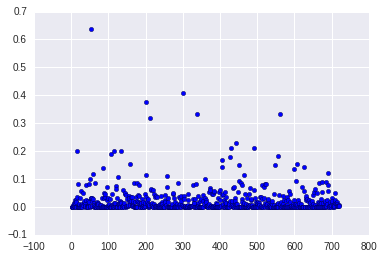

In [6]:
# camgaignID
var = 'camgaignID'
sns.distplot(train[var], kde=False)
# train[var].value_counts()
fig = plt.figure()
means = train.groupby(var)['label'].mean()
plt.scatter(x=means.index, y=means.values)
# means.index
# means.values
# train[var].value_counts()
# 也有只出现过一次的

[2990175, 1565376, 2230637, 146448, 3630071, 529311]


,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator,adID,camgaignID,advertiserID,appID,appPlatform
2990175,1,281627,281629,169,2533838,6796,1,1,489,315,89,420,1
1565376,1,231631,231837,6117,2034171,3322,1,0,676,471,26,123,2
2230637,1,252307,260047,5703,283366,7112,1,1,2928,540,88,123,2
146448,1,171438,171441,6199,1314818,3322,1,2,2979,213,87,116,2
3630071,1,301828,301831,5096,1158202,2579,1,2,3192,588,71,421,1
529311,1,191737,191913,3051,1388331,2579,1,2,3504,513,44,421,1


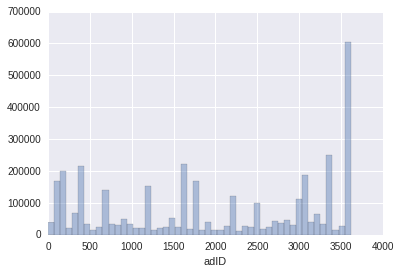

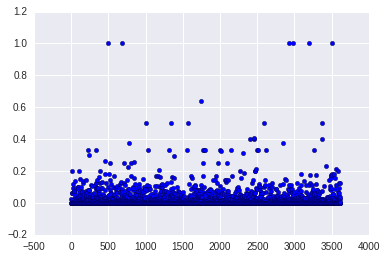

In [7]:
var = 'adID' 
sns.distplot(train[var],kde=False)
fig = plt.figure()
means = train.groupby(var)['label'].mean()
plt.scatter(x=means.index,y=means.values)
# counts = train[var].value_counts()
# type(counts)
# 概率是1的adID号
index = means[means.values == 1].index
index.values
index_select = []
for item in index.values:
    index_select.extend(train[train[var]==item].index)
print index_select
train.iloc[index_select]

,label,adID,camgaignID,advertiserID,appID,appPlatform
label,1.000000,0.013459,-0.004167,0.036255,-0.000401,0.003367
adID,0.013459,1.000000,0.308882,-0.048606,0.016105,0.013106
camgaignID,-0.004167,0.308882,1.000000,-0.211673,0.175949,-0.133096
advertiserID,0.036255,-0.048606,-0.211673,1.000000,-0.660020,0.433173
appID,-0.000401,0.016105,0.175949,-0.660020,1.000000,-0.897595
appPlatform,0.003367,0.013106,-0.133096,0.433173,-0.897595,1.000000


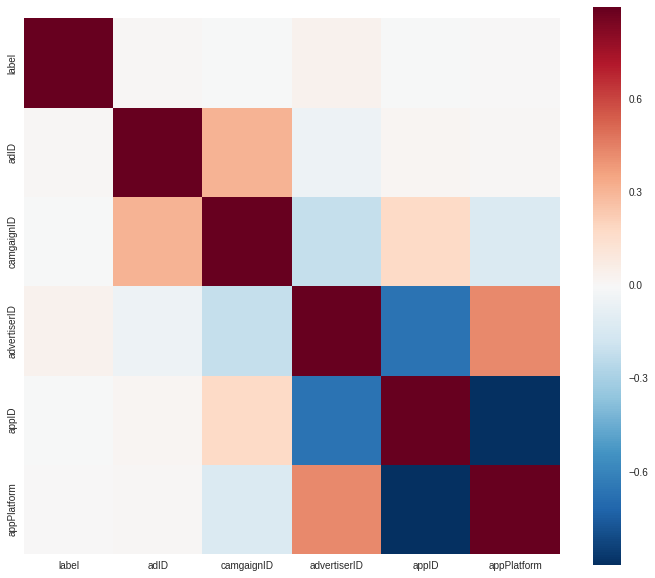

In [8]:
feats = ['label', 'adID', 'camgaignID','advertiserID','appID','appPlatform']
corr = train[feats].corr()
fig = plt.figure(figsize=(12,10))
sns.heatmap(corr, vmax=.8, square=True)
corr